## Boom Bikes - Bike sharing case study
##submitted by Chandana Kalyan

## Importing and Understanding Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [6]:
bike = pd.read_csv('day.csv')
#reading the data
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
#checking the size of the data
bike.shape 

(730, 16)

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
bike.size

11680

In [11]:
# checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [14]:
#dropping unnecessary columns

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [15]:
#changing values of season, weathersit, weekday, month
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit']= bike['weathersit'].map({1: 'Clear',2: 'Misty',3: 'Light-snow', 4: 'Heavy-rain'})
bike['weekday']= bike['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3:'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7:'Sun'})
bike['mnth']= bike['mnth'].map({1: 'Jan', 2: 'Feb', 3:'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11:'Nov', 12: 'Dec'})


In [16]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
bike.head(-1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
724,spring,1,Dec,0,Wed,1,Light-snow,9.976653,11.01665,82.3333,21.208582,441
725,spring,1,Dec,0,Thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341


In [18]:
bike.describe

<bound method NDFrame.describe of      season  yr mnth  holiday weekday  workingday weathersit       temp  \
0    spring   0  Jan        0     Sat           0      Misty  14.110847   
1    spring   0  Jan        0     Sun           0      Misty  14.902598   
2    spring   0  Jan        0     Mon           1      Clear   8.050924   
3    spring   0  Jan        0     Tue           1      Clear   8.200000   
4    spring   0  Jan        0     Wed           1      Clear   9.305237   
..      ...  ..  ...      ...     ...         ...        ...        ...   
725  spring   1  Dec        0     Thu           1      Misty  10.420847   
726  spring   1  Dec        0     Fri           1      Misty  10.386653   
727  spring   1  Dec        0     Sat           0      Misty  10.386653   
728  spring   1  Dec        0     Sun           0      Clear  10.489153   
729  spring   1  Dec        0     Mon           1      Misty   8.849153   

        atemp      hum  windspeed   cnt  
0    18.18125  80.5833 

In [19]:
#numerical columns= ['temp','atemp','hum','windspeed','cnt']
#categorical= ['yr','month','holiday','weekday','workingday','weathersit','season']

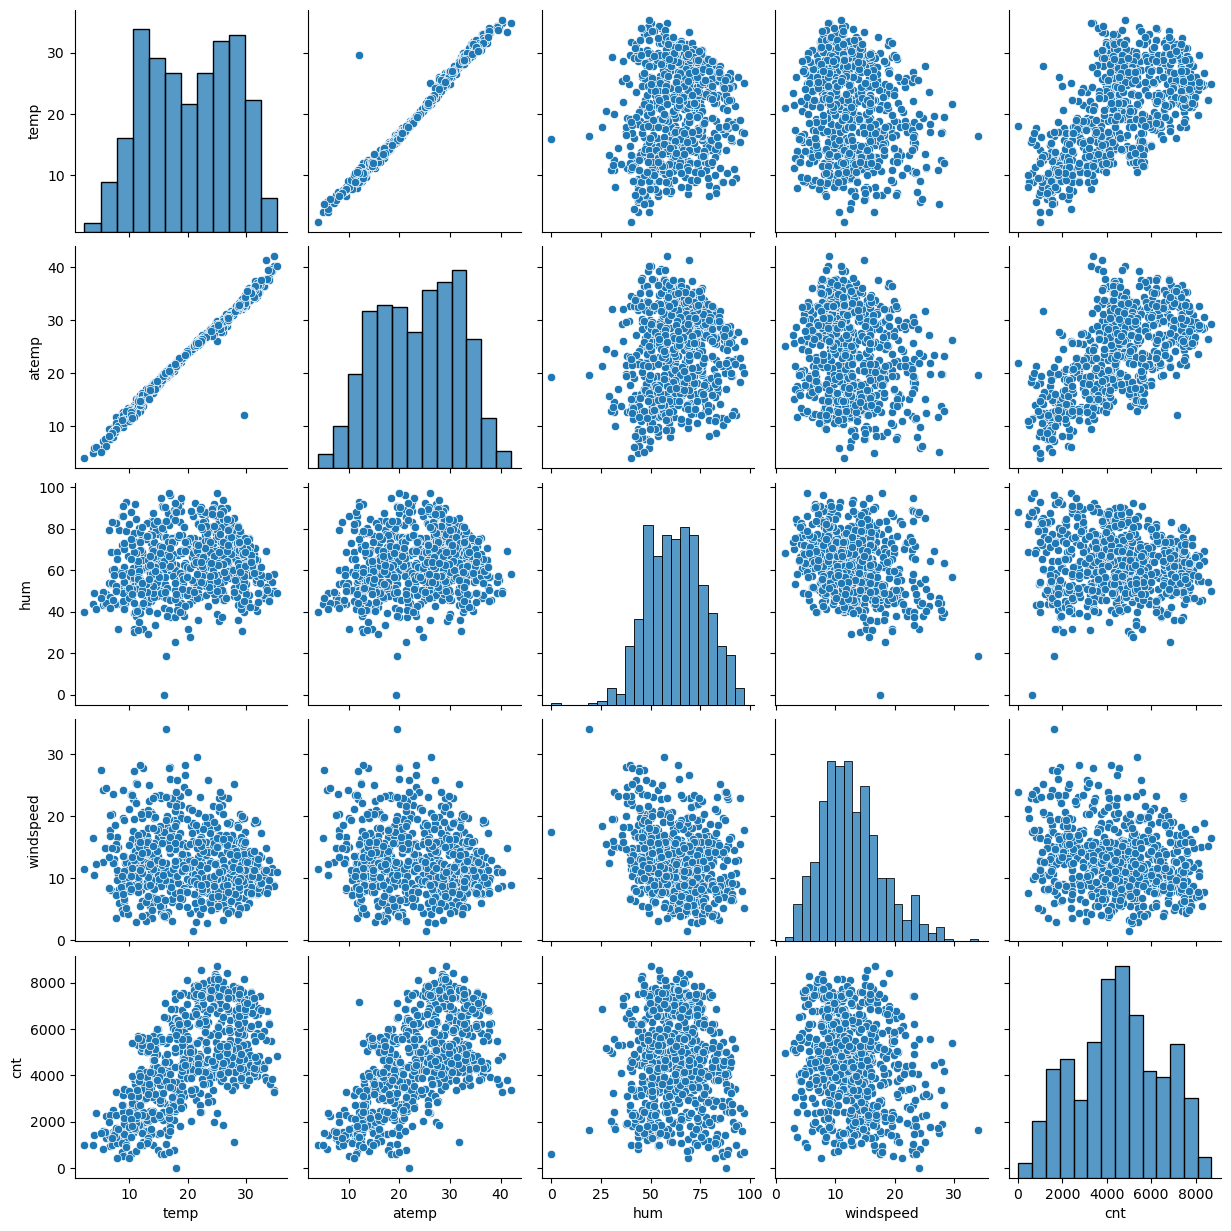

In [20]:
#plotting pairplot between numerical columns
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [21]:
#temp and atemp are positively correlated to cnt

<Axes: >

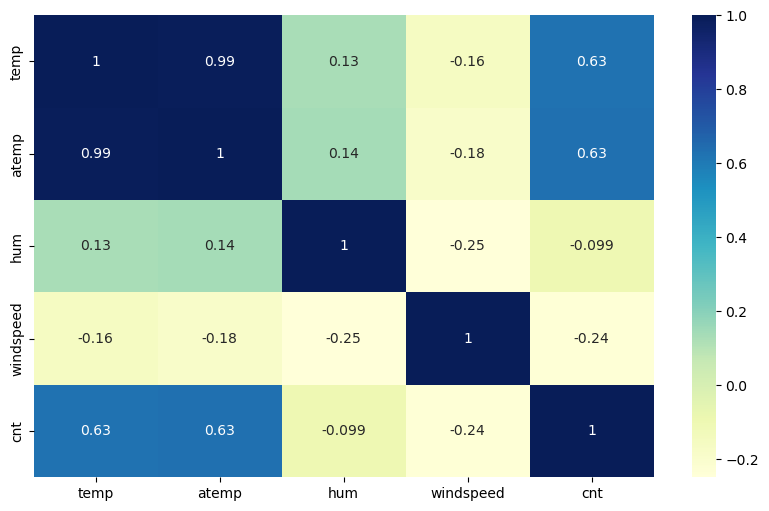

In [22]:
plt.figure(figsize = (10,6))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap='YlGnBu')

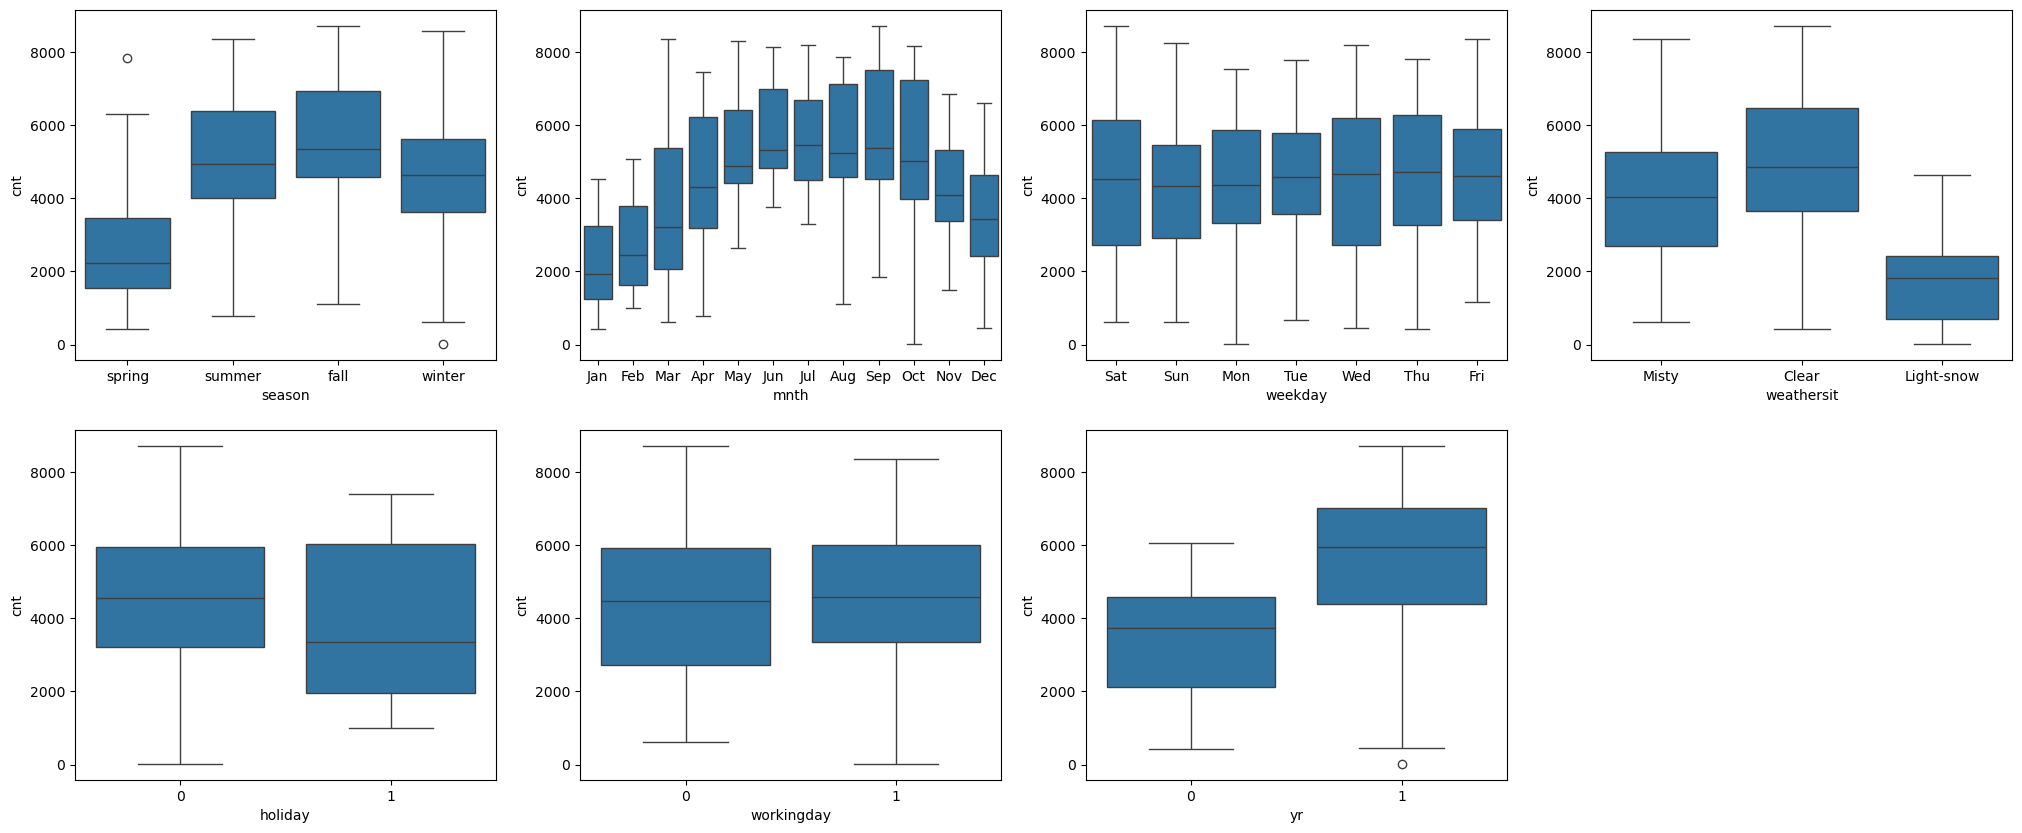

In [23]:
#plotting categorical variables against cnt to see which of them have an impact

plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show() 

##Inferences--
predictor variables like weather,month and season have an impact on target cnt

In [25]:
# Dummy variable creation for weather, weekday, season, month
weather_df=pd.get_dummies(bike['weathersit'],drop_first=True,dtype = 'int')
week_df=pd.get_dummies(bike['weekday'],drop_first=True,dtype = 'int')
season_df=pd.get_dummies(bike['season'],drop_first=True,dtype = 'int')
month_df=pd.get_dummies(bike['mnth'],drop_first=True,dtype = 'int')

In [26]:
weather_df

,Light-snow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [27]:
#concatenating bike dataframe with dummies
bike_new = pd.concat([bike, month_df, week_df, weather_df, season_df], axis=1)

In [28]:
#dropping old categorical columns
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [29]:
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

In [30]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [31]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Aug         730 non-null    int64  
 9   Dec         730 non-null    int64  
 10  Feb         730 non-null    int64  
 11  Jan         730 non-null    int64  
 12  Jul         730 non-null    int64  
 13  Jun         730 non-null    int64  
 14  Mar         730 non-null    int64  
 15  May         730 non-null    int64  
 16  Nov         730 non-null    int64  
 17  Oct         730 non-null    int64  
 18  Sep         730 non-null    int64  
 19  Mon         730 non-null    i

## Splitting test and train data

In [33]:
#resetting random before applying
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
bike_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [35]:
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [36]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [37]:
#Scaling numerical columns to have them on comparable scale(excluding binary and dummy variables)
#scaling the following variables to fit them between -1 and 1 
#using MinMaxscaler
scaler= MinMaxScaler()
col_to_scale = ['temp','atemp','hum','windspeed','cnt']

bike_train[col_to_scale] = scaler.fit_transform(bike_train[col_to_scale])

In [38]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


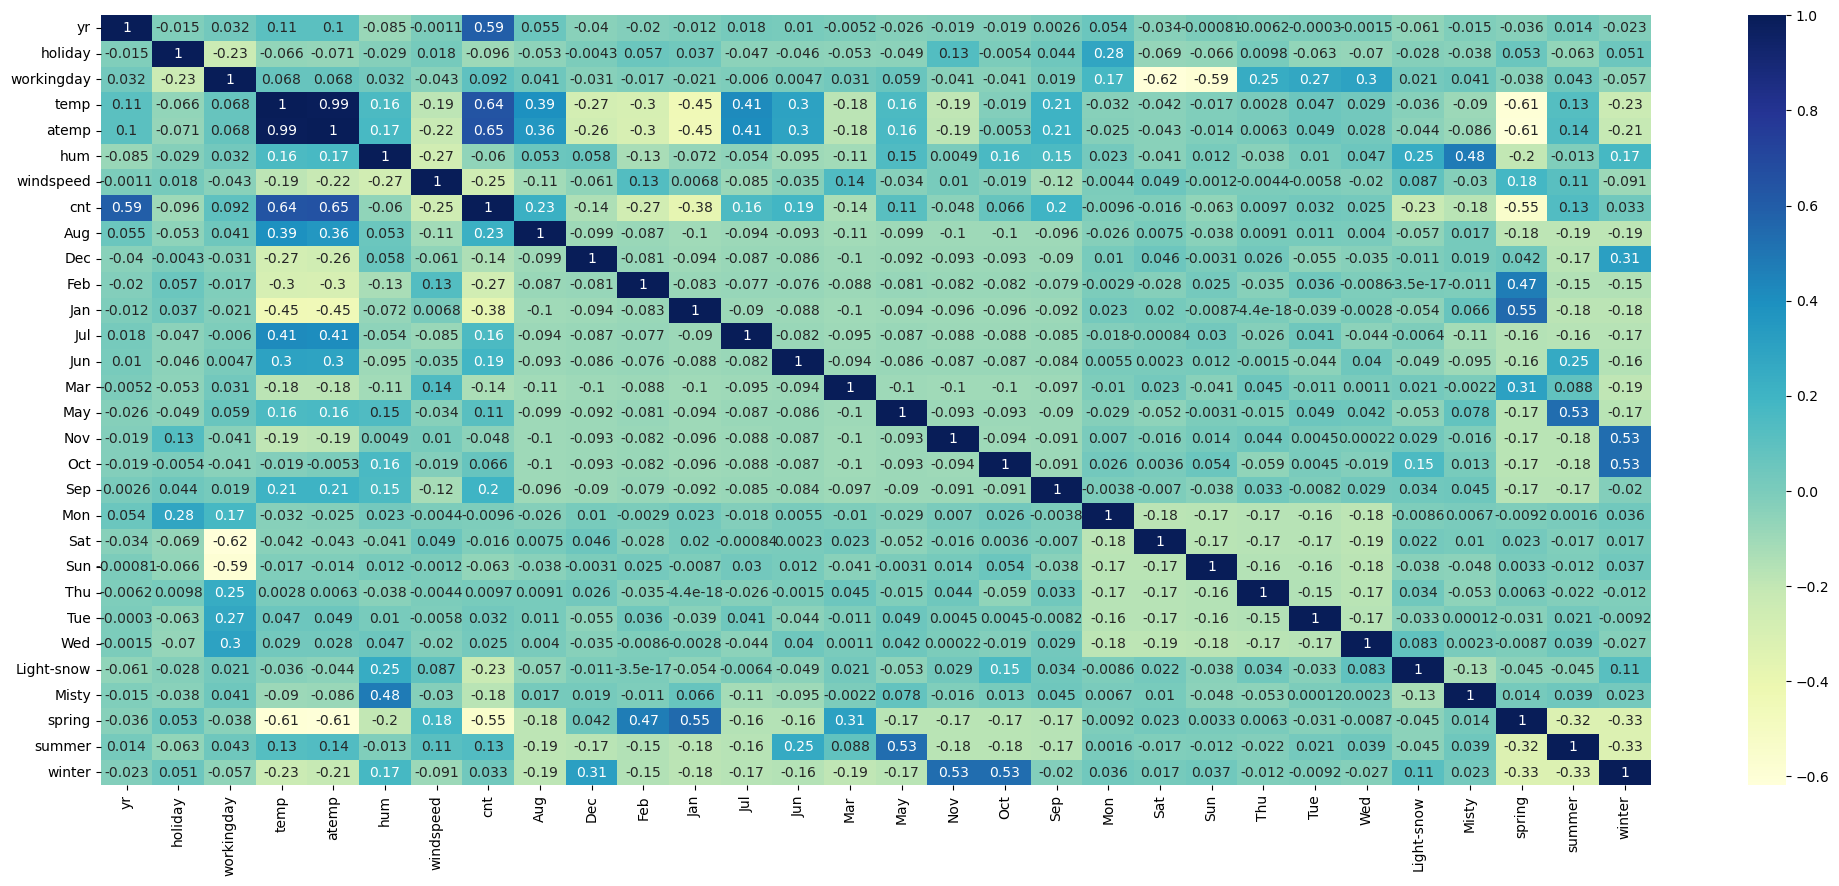

In [39]:
plt.figure(figsize = (25, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## using RFE to automatically choose features for model

In [41]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [42]:
y_train
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [167]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light-snow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
('hum', True, 1),
 ('windspeed', True, 1),
'Sep', True, 1
('Sat', True, 1)
('Sun', True, 1),
('Light-snow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]


In [46]:
# Function to calculate VIF 

def calcVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [47]:
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep',
       'Sat', 'Sun', 'Light-snow', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [48]:
X_train_rfe= X_train[rfe_col]
X_train_rfe.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep',
       'Sat', 'Sun', 'Light-snow', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [49]:
# calculate VIF

calcVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.61
4,hum,1.91
11,Misty,1.57


## Building our model

In [51]:
#1st model

X_train_lm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_lm).fit()
print(lr1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.13e-191
Time:                        13:00:41   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

In [52]:
#dropping holiday column with high p-value
X_train_1 = X_train_rfe.drop(['holiday'], axis = 1)


In [53]:
# re-calculate VIF

calcVIF(X_train_1)

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
7,Sat,4.91
4,windspeed,4.90
11,spring,4.80
8,Sun,4.76
13,winter,3.71
12,summer,3.03
10,Misty,2.31


In [54]:
#2nd model

X_train_lm2 = sm.add_constant(X_train_1)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.13e-191
Time:                        13:00:41   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [55]:
#dropping Sun with high p-value

X_train_2 = X_train_1.drop(['Sun'], axis = 1)
X_train_2.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep', 'Sat',
       'Light-snow', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [56]:
# re-calculate VIF

calcVIF(X_train_2)

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
10,spring,4.18
12,winter,3.40
11,summer,2.83
9,Misty,2.28
0,yr,2.08
7,Sat,1.84


In [57]:
#3rd model

X_train_lm3 = sm.add_constant(X_train_2)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          8.51e-192
Time:                        13:00:41   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2298      0.036      6.451      0.0

In [58]:
calcVIF(X_train_2)

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
10,spring,4.18
12,winter,3.40
11,summer,2.83
9,Misty,2.28
0,yr,2.08
7,Sat,1.84


In [59]:
X_train_3 = X_train_2.drop(['hum'], axis = 1)
X_train_3.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Jul', 'Sep', 'Sat',
       'Light-snow', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [60]:
# re-calculate VIF

calcVIF(X_train_3)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
9,spring,2.38
10,summer,2.31
0,yr,2.07
11,winter,1.92
6,Sat,1.83
4,Jul,1.58
8,Misty,1.56


In [61]:
X_train_4 = X_train_3.drop(['workingday'], axis = 1)
X_train_4.columns

Index(['yr', 'temp', 'windspeed', 'Jul', 'Sep', 'Sat', 'Light-snow', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [62]:
# re-calculate VIF

calcVIF(X_train_4)

,Features,VIF
1,temp,5.12
2,windspeed,4.62
9,summer,2.22
8,spring,2.08
0,yr,2.07
10,winter,1.79
3,Jul,1.58
7,Misty,1.54
4,Sep,1.33
5,Sat,1.18


In [63]:
#4th model

X_train_lm4 = sm.add_constant(X_train_4)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          3.37e-185
Time:                        13:00:41   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1937      0.030      6.478      0.0

In [64]:
X_train_5 = X_train_4.drop(['Sat'], axis = 1)
X_train_5.columns

Index(['yr', 'temp', 'windspeed', 'Jul', 'Sep', 'Light-snow', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [65]:
# re-calculate VIF

calcVIF(X_train_5)

,Features,VIF
1,temp,5.09
2,windspeed,4.60
8,summer,2.21
0,yr,2.07
7,spring,2.07
9,winter,1.77
3,Jul,1.58
6,Misty,1.54
4,Sep,1.33
5,Light-snow,1.08


In [66]:
#5th model

X_train_lm5 = sm.add_constant(X_train_5)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          1.55e-185
Time:                        13:00:41   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1976      0.030      6.603      0.0

In [67]:
lr5.params

const         0.197579
yr            0.233873
temp          0.492502
windspeed    -0.149692
Jul          -0.051320
Sep           0.073166
Light-snow   -0.280991
Misty        -0.079866
spring       -0.069330
summer        0.045682
winter        0.080538
dtype: float64

## Residual analysis

In [69]:
y_train_pred = lr5.predict(X_train_lm5)

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_11616/2049843415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Residual')

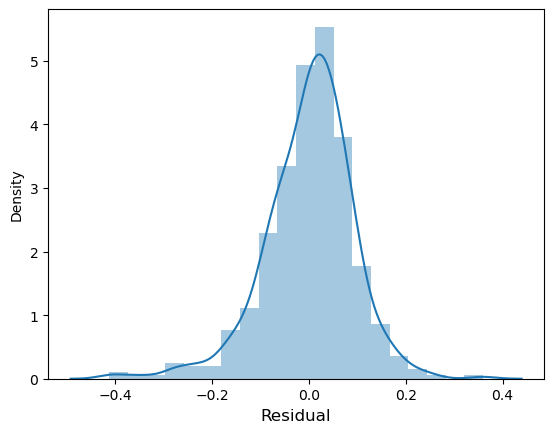

In [70]:
# checking error residual
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)

plt.xlabel('Residual', fontsize = 12) 

In the histogram above, we can see a normal distribution of error terms which justifies assumption of our model

<Axes: xlabel='cnt'>

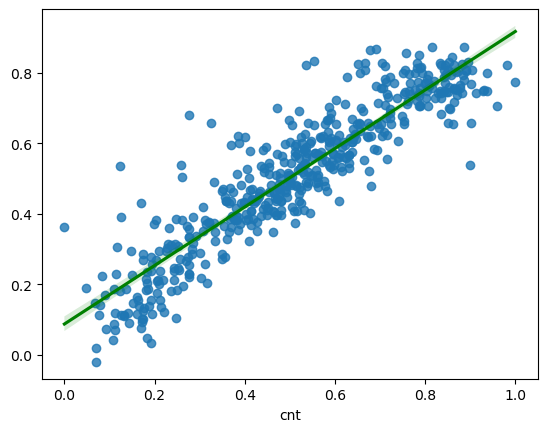

In [72]:
#y_train vs y_train_pred

plt.figure()
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "green"})

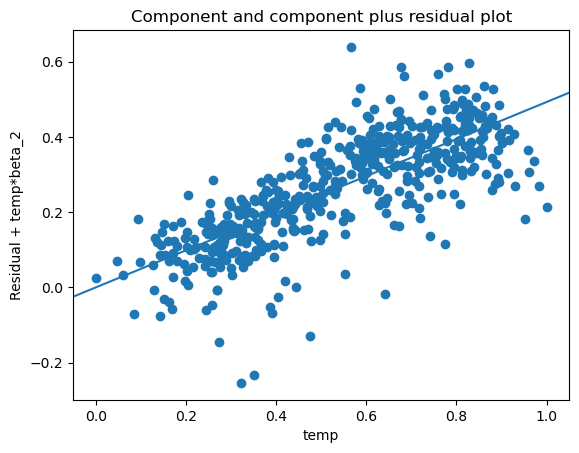

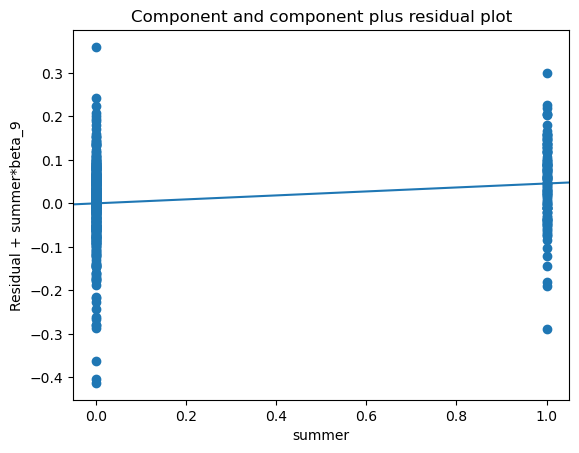

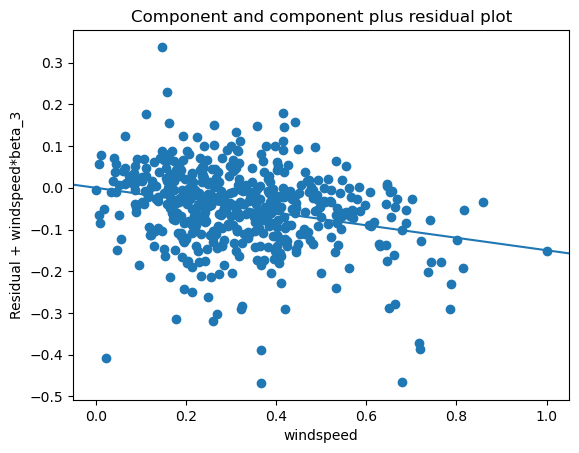

In [73]:
#plotting top 3 VIFs to see linearity

sm.graphics.plot_ccpr(lr5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr5, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr5, 'windspeed')
plt.show()

## predicting on test dataset

In [75]:
# scaling the test dataset before applying model

scaler= MinMaxScaler()
col_to_scale = ['temp','atemp','hum','windspeed','cnt']

bike_test[col_to_scale] = scaler.fit_transform(bike_test[col_to_scale])

In [76]:
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light-snow,Misty,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.224955,0.227731,0.603829,0.388364,0.315062,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
702,1,0,1,0.503971,0.508864,0.667633,0.383644,0.775082,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
127,0,0,0,0.573725,0.577423,0.525522,0.132095,0.489314,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
640,1,0,1,0.745342,0.687659,0.751160,0.111637,0.896530,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [77]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [78]:
X_test= X_test[X_train_5.columns]
X_test.columns

Index(['yr', 'temp', 'windspeed', 'Jul', 'Sep', 'Light-snow', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [79]:
# Adding constant to test data

X_test_lm5 = sm.add_constant(X_test)
X_test_lm5

,const,yr,temp,windspeed,Jul,Sep,Light-snow,Misty,spring,summer,winter
184,1.0,0,0.837241,0.149393,1,0,0,1,0,0,0
535,1.0,1,0.911423,0.231142,0,0,0,0,0,1,0
299,1.0,0,0.496221,0.443398,0,0,0,1,0,0,1
221,1.0,0,0.890387,0.449707,0,0,0,0,0,0,0
152,1.0,0,0.821739,0.682387,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.224955,0.388364,0,0,0,1,1,0,0
702,1.0,1,0.503971,0.383644,0,0,0,0,0,0,1
127,1.0,0,0.573725,0.132095,0,0,0,0,0,1,0
640,1.0,1,0.745342,0.111637,0,0,0,1,0,0,1


In [80]:
y_test_pred = lr5.predict(X_test_lm5)
y_test_pred

184    0.456373
535    0.891411
299    0.376268
221    0.568779
152    0.545821
         ...   
400    0.334911
702    0.702769
127    0.506048
640    0.782496
72     0.234550
Length: 219, dtype: float64

/var/folders/ld/knz66s750qgb_2by_6ff63sm0000gp/T/ipykernel_11616/3483407009.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_test_pred), bins = 20)


Text(0.5, 0, 'Residual')

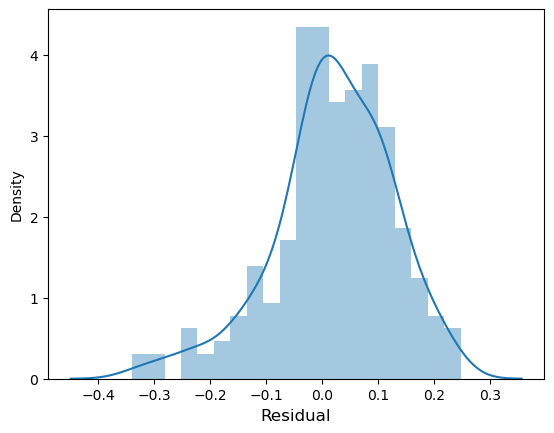

In [81]:
# checking error residual for test data prediction

fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)

plt.xlabel('Residual', fontsize = 12) 

In [82]:
#calculating r-squared

r2 = r2_score(y_test, y_test_pred)
r2

0.7934448005078439

<Axes: xlabel='cnt'>

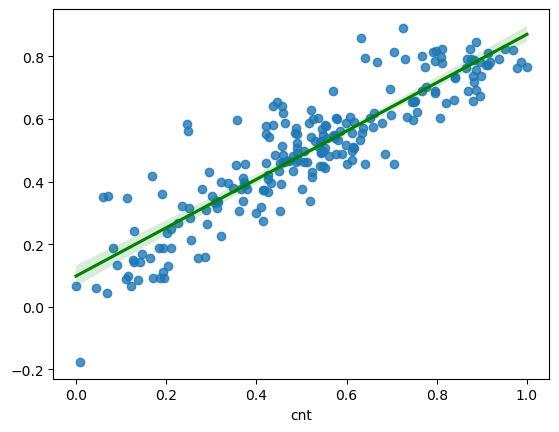

In [83]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "green"})

In [84]:
#calculating adjusted r-squared

adjusted_r2 = 1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print(adjusted_r2)

0.7835142620707211


In [85]:
# co-efficients and final regression equation

lr5.params

const         0.197579
yr            0.233873
temp          0.492502
windspeed    -0.149692
Jul          -0.051320
Sep           0.073166
Light-snow   -0.280991
Misty        -0.079866
spring       -0.069330
summer        0.045682
winter        0.080538
dtype: float64

#final regression equation

cnt = 0.1976 + 0.2339*yr + 0.4925*temp - 0.1497*windspeed - 0.0513*Jul + 0.0732*Sep - 0.2809*Light-snow - 0.0799*Misty - 0.0693*spring + 0.0457*summer + 0.0803*winter 


In [87]:
#end